# Lab 12

_[General notebook information](https://computing-in-context.afeld.me/notebooks.html)_

You'll need to [install](https://computing-in-context.afeld.me/notebooks.html#installing-packages) [`lxml`](https://anaconda.org/conda-forge/lxml) and [`requests`](https://anaconda.org/conda-forge/requests).

## Scraping

Common tools:

- [Beautiful Soup package](https://realpython.com/beautiful-soup-web-scraper-python/)
- [pandas' `read_html()`](https://pandas.pydata.org/docs/user_guide/io.html#html)

Pull [Wikipedia's list of countries by area](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area#Countries_and_dependencies_by_area) into a DataFrame using `read_html()`.

In [6]:
import pandas as pd

tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area",
                      match="Country / dependency")
countries = tables[0]
countries

,Unnamed: 0,Country / dependency,Total in km2 (mi2),Land in km2 (mi2),Water in km2 (mi2),% water,Unnamed: 6
0,–,Earth,"510,072,000 (196,940,000)","148,940,000 (57,506,000)","361,132,000 (139,434,000)",70.8,NaN
1,1,Russia,"17,098,246 (6,601,667)","16,376,870 (6,323,142)","721,380 (278,530)",4.2,[b]
2,–,Antarctica,"14,200,000 (5,480,000)","14,200,000 (5,480,000)",0,0.0,[c]
3,2,Canada,"9,984,670 (3,855,100)","9,093,507 (3,511,021)","891,163 (344,080)",8.9,[d]
4,3/4 [e],China,"9,596,960 (3,705,410)","9,326,410 (3,600,950)","270,550 (104,460)",2.8,[f]
...,...,...,...,...,...,...,...
259,–,Ashmore and Cartier Islands (Australia),5.0 (1.9),5.0 (1.9),0,0.0,[q]
260,–,Coral Sea Islands (Australia),3.0 (1.2),3.0 (1.2),0,0.0,[db]
261,–,Spratly Islands (disputed),2.0 (0.77),2.0 (0.77),0,0.0,[54]
262,194,Monaco,2.0 (0.77),2.0 (0.77),0,0.0,[dc]


## FEC data

We'll make an API call in the browser.

1. Visit https://www.fec.gov/data/candidates/
1. [Open Developer Tools](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/What_are_browser_developer_tools#how_to_open_the_devtools_in_your_browser).
1. Reload the page.
1. In the Network tab's request list:
   1. Filter to Fetch/XHR/AJAX (terminology will differ by browser)
   1. Right-click the API call row.
1. Click `Open in New Tab`. You will see an error.
1. In the URL bar, replace the `api_key` value with `DEMO_KEY`. The URL should therefore contain `api_key=DEMO_KEY`.

You should see a big wall of JSON data.


### Querying

Retrieve candidates who have raised funds. [API documentation.](https://api.open.fec.gov/developers/)

In [10]:
import requests
parameters = {'api_key' : 'DEMO_KEY', 'has_reaised_funds' : True}
json_data = requests.get('https://api.open.fec.gov/v1/candidates/', params = parameters).json()
json_data

{'api_version': '1.0',
 'pagination': {'count': 50780,
  'is_count_exact': True,
  'page': 1,
  'pages': 2539,
  'per_page': 20},
 'results': [{'active_through': 2024,
   'candidate_id': 'P40014052',
   'candidate_inactive': False,
   'candidate_status': 'N',
   'cycles': [2024],
   'district': '00',
   'district_number': 0,
   'election_districts': ['00'],
   'election_years': [2024],
   'federal_funds_flag': False,
   'first_file_date': '2023-06-24',
   'has_raised_funds': False,
   'inactive_election_years': None,
   'incumbent_challenge': 'C',
   'incumbent_challenge_full': 'Challenger',
   'last_f2_date': '2023-06-24',
   'last_file_date': '2023-06-24',
   'load_date': '2023-07-10T21:05:09',
   'name': '212 N HALF  W. JOHN, RODNEY HOWARD MR.',
   'office': 'P',
   'office_full': 'President',
   'party': 'IND',
   'party_full': 'INDEPENDENT',
   'state': 'US'},
  {'active_through': 2024,
   'candidate_id': 'P40013401',
   'candidate_inactive': False,
   'candidate_status': 'N',
   

Turn those results into a DataFrame.

In [12]:
df = pd.DataFrame.from_dict(json_data['results'])
df.head()

,active_through,candidate_id,candidate_inactive,candidate_status,cycles,district,district_number,election_districts,election_years,federal_funds_flag,...,incumbent_challenge_full,last_f2_date,last_file_date,load_date,name,office,office_full,party,party_full,state
0,2024,P40014052,False,N,[2024],00,0,[00],[2024],False,...,Challenger,2023-06-24,2023-06-24,2023-07-10T21:05:09,"212 N HALF W. JOHN, RODNEY HOWARD MR.",P,President,IND,INDEPENDENT,US
1,2024,P40013401,False,N,[2024],00,0,[00],[2024],False,...,Challenger,2023-06-04,2023-06-04,2023-06-08T21:05:05,"375 ROB ROY DR, DAVID J SR SR",P,President,DEM,DEMOCRATIC PARTY,US
2,2024,P40013393,False,N,[2024],00,0,[00],[2024],False,...,Challenger,2023-06-04,2023-06-04,2023-06-08T21:05:05,"375 ROB ROY DR, DAVID J SR SR",P,President,DEM,DEMOCRATIC PARTY,US
3,2020,P00011569,False,N,"[2020, 2022]",00,0,[00],[2020],False,...,Challenger,2019-04-23,2019-04-23,2021-12-08T06:50:50,"753, JO",P,President,NNE,NONE,US
4,2004,P40002172,False,N,"[2002, 2004]",00,0,[00],[2004],False,...,Challenger,2002-01-30,2002-01-30,2002-04-12T00:00:00,"AABBATTE, MICHAEL THOMAS WITORT",P,President,IND,INDEPENDENT,US


## Pagination

Get _all_ [NYC film permits](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p/about_data) through [the API](https://dev.socrata.com/foundry/data.cityofnewyork.us/tg4x-b46p). [Documentation on paging.](https://dev.socrata.com/docs/paging)

**Hints**

You'll probably want to create DataFrames for each page, then "concatenate" them. Here's a structure you can start with:

In [14]:
# in a loop
#     get the first/next page of data
#     combine with the data that's already been retrieved
#     if there are fewer than the default number of records returned, stop the loop

!pip install sodapy
from sodapy import Socrata

limit = 1000
offset = 0
all_results = []
client = Socrata('data.cityofnewyork.us', None)

while True:
    results = client.get('tg4x-b46p', limit = limit, offset = offset)
    all_results.extend(results)
    offset = offset + limit
    print(len(results),offset)
    if len(results) < limit:
        break



1000 1000
1000 2000
1000 3000
1000 4000
1000 5000
1000 6000
1000 7000
1000 8000
846 9000


In [15]:
df1 = pd.DataFrame.from_dict(all_results)
df1

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
0,807084,Shooting Permit,2024-08-25T01:00:00.000,2024-08-25T13:00:00.000,2024-08-23T03:29:50.000,Mayor's Office of Media & Entertainment,WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,18,Television,News,United States of America,"10036, 10105"
1,806932,Shooting Permit,2024-08-26T07:00:00.000,2024-08-26T21:00:00.000,2024-08-22T12:45:25.000,Mayor's Office of Media & Entertainment,KINGSLAND AVENUE between GREENPOINT AVENUE and...,Brooklyn,1,94,Television,Cable-episodic,United States of America,11222
2,806927,Shooting Permit,2024-08-26T06:00:00.000,2024-08-26T15:00:00.000,2024-08-22T12:25:33.000,Mayor's Office of Media & Entertainment,"WEST 14 ST between 10TH AVE and WASHINGTON ST,...",Manhattan,"2, 4","10, 6",Commercial,Commercial,United States of America,"10011, 10014"
3,806915,Shooting Permit,2024-08-26T07:00:00.000,2024-08-26T22:00:00.000,2024-08-22T11:41:51.000,Mayor's Office of Media & Entertainment,EAST 74 STREET between LEXINGTON AVENUE and ...,Manhattan,8,19,Television,Cable-episodic,United States of America,"10021, 10075"
4,806888,Shooting Permit,2024-08-25T06:00:00.000,2024-08-25T20:00:00.000,2024-08-22T08:45:33.000,Mayor's Office of Media & Entertainment,NASSAU STREET between GOLD STREET and DUFFIELD...,Brooklyn,"1, 2, 3","108, 5, 7, 84, 94",Television,Episodic series,United States of America,"10002, 11101, 11201, 11222"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8841,677679,Shooting Permit,2023-02-12T06:00:00.000,2023-02-12T22:00:00.000,2022-10-20T11:37:25.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
8842,677675,Shooting Permit,2023-02-11T06:00:00.000,2023-02-11T22:00:00.000,2022-10-20T11:34:37.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
8843,677670,Shooting Permit,2023-02-10T06:00:00.000,2023-02-10T22:00:00.000,2022-10-20T11:21:38.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019
8844,677666,Shooting Permit,2023-02-09T06:00:00.000,2023-02-09T22:00:00.000,2022-10-20T11:17:44.000,Mayor's Office of Media & Entertainment,WEST 58 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,18,Television,Variety,United States of America,10019


## GitHub

1. [Sign up.](https://github.com/signup)
    - If you have an account already, [sign in](https://github.com/login).
    - A [Free plan](https://github.com/pricing) is sufficient.
1. [Open](https://code.visualstudio.com/docs/editor/workspaces#_how-do-i-open-a-vs-code-workspace) the folder/repository from [Lecture 23](https://computing-in-context.afeld.me/lecture_23.html) in VSCode.
1. In bottom left, the [Publish](https://code.visualstudio.com/docs/sourcecontrol/overview#_git-status-bar-actions) icon (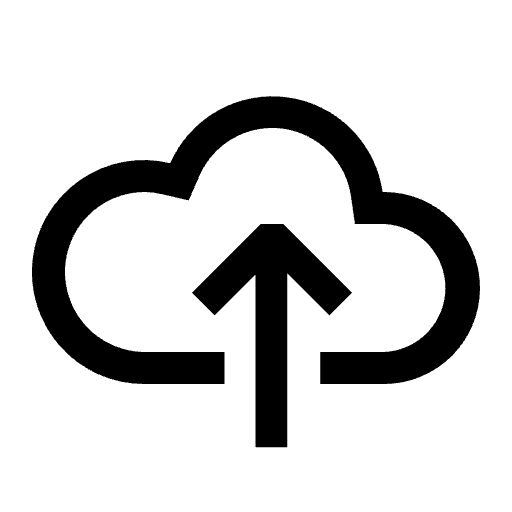). <!-- https://icon-sets.iconify.design/codicon/cloud-upload/ -->
1. [Allow signing in with GitHub](https://code.visualstudio.com/docs/sourcecontrol/github#_authenticating-with-an-existing-repository), if prompted.
1. Click `Publish to GitHub public repository`.
    1. [Public vs. private](https://docs.github.com/en/repositories/creating-and-managing-repositories/about-repositories#about-repository-visibility)
1. [Push (a.k.a. "sync")](https://code.visualstudio.com/docs/sourcecontrol/overview#_remotes) your repository.
1. Visit the repository on GitHub.
    1. Click into the files.
1. Make a change in the repository in VSCode (locally).
1. Commit the change.
1. Push the change to GitHub.

## [JupyterBook](https://jupyterbook.org/)

- Used to build the [course site](https://computing-in-context.afeld.me/)
- [Install `jupyter-book` via Anaconda](https://computing-in-context.afeld.me/notebooks.html#installing-packages)

### [Config](https://jupyterbook.org/en/stable/customize/config.html)

Create minimal `_config.yml`:

```yaml
title: NAME
author: NAME

execute:
  execute_notebooks: off
```

[More about YAML.](https://www.cloudbees.com/blog/yaml-tutorial-everything-you-need-get-started)

### [Table of contents](https://jupyterbook.org/customize/toc.html)

Create a `_toc.yml`:

```yaml
format: jb-book
root: project_3.ipynb
```

### [Build the site](https://jupyterbook.org/en/stable/start/build.html#build-your-books-html)

[Open a terminal](https://code.visualstudio.com/docs/terminal/getting-started) and run:

```sh
jupyter-book build .
```

### View the site (locally)

On Mac:

```sh
open _build/html/index.html
```

On Windows:

```powershell
"_build\html\index.html"
```

Alternatively,

- Find the file through Finder / Windows Explorer and double-click
- From your browser, go to `File`->`Open File…`

## Commit changes

1. [View the diff](https://code.visualstudio.com/docs/sourcecontrol/overview#_viewing-diffs)
1. [Ignore](https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files#configuring-ignored-files-for-a-single-repository) `_build/` files
1. Commit
1. Push

---

Submit via Gradescope.